##TODO:


outliers isolation

graphs (3.g. scatterplot matrix)

correlation matrix


correlations w/out outliers


operations btwn cols


group continuous features (e.g. price range)

In [1]:
import pandas as pd

In [2]:
from base_data_handler import BaseDataHandler
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
file_path = "Cars Datasets 2025.csv"
handler = BaseDataHandler(file_path, encoding='latin-1')

## Dataframe:

In [4]:
handler.print_dataframe()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


## Describe:

In [5]:
handler.df.describe()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
count,1218,1218,1218,1215,1218,1218,1212,1218,1218,1218,1217
unique,37,1201,356,311,456,114,180,535,23,19,263
top,Nissan,Polo BlueMotion,I4,1984 cc,355 hp,250 km/h,6.5 sec,"$35,000",Petrol,5,400 Nm
freq,149,2,64,31,23,145,45,36,871,692,72


In [6]:
handler.df.head(100)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm
...,...,...,...,...,...,...,...,...,...,...,...
95,MERCEDES,BENZ GLE 53,V6,"2,996 cc",429 hp,250 km/h,5.2 sec,"$71,000",Petrol,5,620 Nm
96,MERCEDES,BENZ S-CLASS S 350,I4,"1,991 cc",255 hp,250 km/h,6.5 sec,"$90,000",Petrol,5,500 Nm
97,MERCEDES,BENZ EQS 53,ELECTRIC MOTOR,NaN,751 hp,250 km/h,3.4 sec,"$102,000",Electric,5,950 Nm
98,MERCEDES,BENZ MAYBACH S 680,V12,"5,980 cc",630 hp,250 km/h,4.7 sec,"$200,000",Petrol,5,1000 Nm


## Null Handle:

In [7]:
handler.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [8]:
handler.df.dropna(inplace=True)
handler.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1210 non-null   object
 1   Cars Names                 1210 non-null   object
 2   Engines                    1210 non-null   object
 3   CC/Battery Capacity        1210 non-null   object
 4   HorsePower                 1210 non-null   object
 5   Total Speed                1210 non-null   object
 6   Performance(0 - 100 )KM/H  1210 non-null   object
 7   Cars Prices                1210 non-null   object
 8   Fuel Types                 1210 non-null   object
 9   Seats                      1210 non-null   object
 10  Torque                     1210 non-null   object
dtypes: object(11)
memory usage: 113.4+ KB


# Data Cleaning
## Fuel Types normalized as strings, stripped and sorted

In [9]:
clean_df = handler.df.copy()
clean_df["Fuel Types"] = (
    handler.df["Fuel Types"]
    .astype(str)              # ensure strings
    .str.strip()              # remove leading/trailing whitespace
    .str.replace(r"\s+", " ", regex=True)  # normalize multiple spaces
    .str.title()              # consistent capitalization
)


clean_df['Fuel Types'] = clean_df["Fuel Types"] = (
    clean_df["Fuel Types"]
    .astype(str)
    .str.replace(r"[\/\(\)]", ",", regex=True)  # replace / ( ) with commas
)

clean_df["Fuel Types"] = clean_df["Fuel Types"].str.replace(r"\s+", " ", regex=True).str.strip()


clean_df["Fuel Types"] = (
    clean_df["Fuel Types"]
    .str.split(",")
    .apply(lambda parts: ", ".join(sorted([p.strip().title() for p in parts if p.strip()])))
)

mask = clean_df["Fuel Types"].str.contains("Gas", case=False, na=False)
clean_df = clean_df[~mask]
mask = clean_df["Fuel Types"].str.contains("Plug", case=False, na=False)
clean_df = clean_df[~mask]

#visualization
group_df = clean_df.groupby("Fuel Types").count()
group_df.head(200)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Seats,Torque
Fuel Types,,,,,,,,,,
"Awd, Petrol",2,2,2,2,2,2,2,2,2,2
"Cng, Petrol",1,1,1,1,1,1,1,1,1,1
Diesel,102,102,102,102,102,102,102,102,102,102
"Diesel, Petrol",23,23,23,23,23,23,23,23,23,23
Electric,95,95,95,95,95,95,95,95,95,95
"Electric, Hybrid",1,1,1,1,1,1,1,1,1,1
"Ev, Petrol",1,1,1,1,1,1,1,1,1,1
Hybrid,79,79,79,79,79,79,79,79,79,79
"Hybrid, Petrol",23,23,23,23,23,23,23,23,23,23


## Cleaned and stripped Company Names

In [10]:
clean_df = clean_df.copy()
clean_df["Company Names"] = (
    clean_df["Company Names"]
    .astype(str)              # ensure strings
    .str.strip()              # remove leading/trailing whitespace
    .str.replace(r"\s+", " ", regex=True)  # normalize multiple spaces
    .str.title()              # consistent capitalization
)

group_df = clean_df.groupby("Company Names").count()
group_df.head(200)


,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
Company Names,,,,,,,,,,
Acura,27,27,27,27,27,27,27,27,27,27
Aston Martin,11,11,11,11,11,11,11,11,11,11
Audi,21,21,21,21,21,21,21,21,21,21
Bentley,1,1,1,1,1,1,1,1,1,1
Bmw,41,41,41,41,41,41,41,41,41,41
Bugatti,10,10,10,10,10,10,10,10,10,10
Cadillac,20,20,20,20,20,20,20,20,20,20
Chevrolet,58,58,58,58,58,58,58,58,58,58
Ferrari,8,8,8,8,8,8,8,8,8,8


In [11]:
group_df = clean_df.groupby("Cars Prices").count()
print(group_df.head(1500))

             Company Names  Cars Names  Engines  CC/Battery Capacity  \
Cars Prices                                                            
$1,000,000               1           1        1                    1   
$1,100,000               3           3        3                    3   
$1,300,000               1           1        1                    1   
$1,700,000               1           1        1                    1   
$10,000                  2           2        2                    2   
...                    ...         ...      ...                  ...   
$98,000                  1           1        1                    1   
$98,300                  2           2        2                    2   
$98,490                  1           1        1                    1   
$99,000                  1           1        1                    1   
 33,000                 1           1        1                    1   

             HorsePower  Total Speed  Performance(0 - 100 )KM/H

In [12]:
handler.try_init_df(clean_df)
handler.try_clean_string_to_number_col("Cars Prices")

clean_df = handler.df.copy()
group_df = clean_df.groupby("Cars Prices").count()
print(group_df.head(1500))


             Company Names  Cars Names  Engines  CC/Battery Capacity  \
Cars Prices                                                            
4000.0                   1           1        1                    1   
5000.0                   1           1        1                    1   
6200.0                   1           1        1                    1   
6500.0                   1           1        1                    1   
7000.0                   1           1        1                    1   
...                    ...         ...      ...                  ...   
5000000.0                1           1        1                    1   
5800000.0                1           1        1                    1   
6000000.0                1           1        1                    1   
9000000.0                1           1        1                    1   
18000000.0               1           1        1                    1   

             HorsePower  Total Speed  Performance(0 - 100 )KM/H

In [13]:
clean_df = clean_df.drop(columns=['Engines'])
clean_df.head()

,Company Names,Cars Names,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
1,Rolls Royce,PHANTOM,6749 cc,563 hp,250 km/h,5.3 sec,460000.0,Petrol,5,900 Nm
2,Ford,KA+,"1,200 cc",70-85 hp,165 km/h,10.5 sec,13500.0,Petrol,5,100 - 140 Nm
3,Mercedes,GT 63 S,"3,982 cc",630 hp,250 km/h,3.2 sec,161000.0,Petrol,4,900 Nm
4,Audi,AUDI R8 Gt,"5,204 cc",602 hp,320 km/h,3.6 sec,253290.0,Petrol,2,560 Nm
5,Bmw,Mclaren 720s,"3,994 cc",710 hp,341 km/h,2.9 sec,499000.0,Petrol,2,770 Nm


In [14]:
group_df = clean_df.groupby("Total Speed").count()
group_df.head(200)

,Company Names,Cars Names,CC/Battery Capacity,HorsePower,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
Total Speed,,,,,,,,,
100 km/h,1,1,1,1,1,1,1,1,1
105 km/h,1,1,1,1,1,1,1,1,1
110 km/h,4,4,4,4,4,4,4,4,4
120 km/h,11,11,11,11,11,11,11,11,11
125 km/h,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
490 km/h,1,1,1,1,1,1,1,1,1
500 km/h,1,1,1,1,1,1,1,1,1
80 km/h,1,1,1,1,1,1,1,1,1


In [15]:
handler.df = clean_df.copy()


In [16]:
s, clean_df = handler.try_clean_column_names()
clean_df.head()

,company_names,cars_names,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
1,Rolls Royce,PHANTOM,6749 cc,563 hp,250 km/h,5.3 sec,460000.0,Petrol,5,900 Nm
2,Ford,KA+,"1,200 cc",70-85 hp,165 km/h,10.5 sec,13500.0,Petrol,5,100 - 140 Nm
3,Mercedes,GT 63 S,"3,982 cc",630 hp,250 km/h,3.2 sec,161000.0,Petrol,4,900 Nm
4,Audi,AUDI R8 Gt,"5,204 cc",602 hp,320 km/h,3.6 sec,253290.0,Petrol,2,560 Nm
5,Bmw,Mclaren 720s,"3,994 cc",710 hp,341 km/h,2.9 sec,499000.0,Petrol,2,770 Nm


In [17]:
col = "cc_battery_capacity"

handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.head(1500)

,company_names,cars_names,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
cc_battery_capacity,,,,,,,,,
1.24,1,1,1,1,1,1,1,1,1
1.56,1,1,1,1,1,1,1,1,1
11.40,2,2,2,2,2,2,2,2,2
11.60,1,1,1,1,1,1,1,1,1
16.00,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
7700.00,1,1,1,1,1,1,1,1,1
7993.00,10,10,10,10,10,10,10,10,10
12800.00,4,4,4,4,4,4,4,4,4


In [18]:
col = "horsepower"

handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.head(1500)

,company_names,cars_names,cc_battery_capacity,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
horsepower,,,,,,,,,
26.0,1,1,1,1,1,1,1,1,1
37.0,1,1,1,1,1,1,1,1,1
47.0,1,1,1,1,1,1,1,1,1
48.0,2,2,2,2,2,2,2,2,2
52.0,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
1160.0,1,1,1,1,1,1,1,1,1
1288.0,1,1,1,1,1,1,1,1,1
1500.0,6,6,6,6,6,6,6,6,6


In [19]:
col = "torque"

handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.head(1500)

,company_names,cars_names,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats
torque,,,,,,,,,
45.0,1,1,1,1,1,1,1,1,1
51.0,1,1,1,1,1,1,1,1,1
60.0,3,3,3,3,3,3,3,3,3
62.0,1,1,1,1,1,1,1,1,1
80.0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
2500.0,2,2,2,2,2,2,2,2,2
2600.0,1,1,1,1,1,1,1,1,1
3500.0,1,1,1,1,1,1,1,1,1


In [20]:
col = "performance"
handler.try_rename_col(col="performance_0_100_km_h", name=col)

handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.head(1500)

,company_names,cars_names,cc_battery_capacity,horsepower,total_speed,cars_prices,fuel_types,seats,torque
performance,,,,,,,,,
1.9,1,1,1,1,1,1,1,1,1
2.1,1,1,1,1,1,1,1,1,1
2.2,1,1,1,1,1,1,1,1,1
2.3,1,1,1,1,1,1,1,1,1
2.4,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...
20.0,1,1,1,1,1,1,1,1,1
22.0,1,1,1,1,1,1,1,1,1
23.0,1,1,1,1,1,1,1,1,1


In [21]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 1 to 1216
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company_names        1201 non-null   object 
 1   cars_names           1201 non-null   object 
 2   cc_battery_capacity  1199 non-null   float64
 3   horsepower           1201 non-null   float64
 4   total_speed          1201 non-null   object 
 5   performance          1201 non-null   float64
 6   cars_prices          1201 non-null   float64
 7   fuel_types           1201 non-null   object 
 8   seats                1201 non-null   object 
 9   torque               1201 non-null   float64
dtypes: float64(5), object(5)
memory usage: 103.2+ KB


Rappresentazione case automobilistiche

In [22]:
freq_comp_names = pd.crosstab(index = clean_df['company_names'], columns = "counts" )
print(f"La casa più rapppresentata è: {freq_comp_names['counts'].idxmax()}")
freq_comp_names

La casa più rapppresentata è: Nissan


col_0,counts
company_names,
Acura,27
Aston Martin,11
Audi,21
Bentley,1
Bmw,41
Bugatti,10
Cadillac,20
Chevrolet,58
Ferrari,8


**scatter matrix  (con outlieres)**

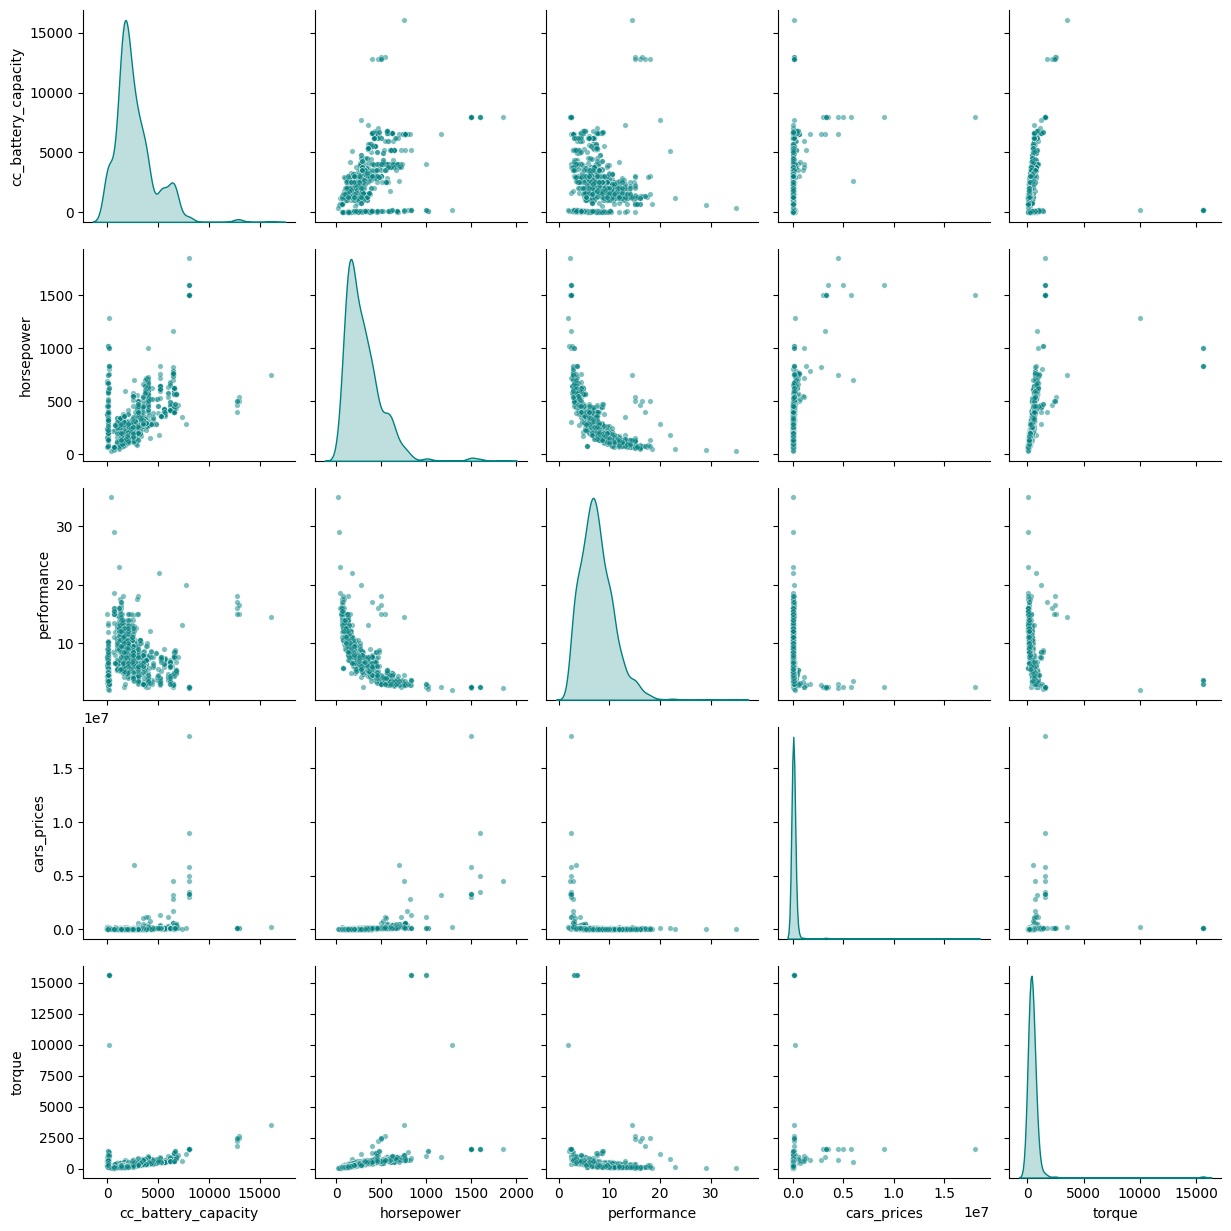

In [23]:
numerical = clean_df.select_dtypes(include=['float64', 'int64'])
sns.pairplot(numerical,
                diag_kind='kde', 
                 plot_kws={'alpha': 0.5, 's': 15, 'color': 'teal'},
                 diag_kws={'color': 'teal', 'fill': True},
                 height=2.5)

**Matrice di correlazione (con outlieres)**

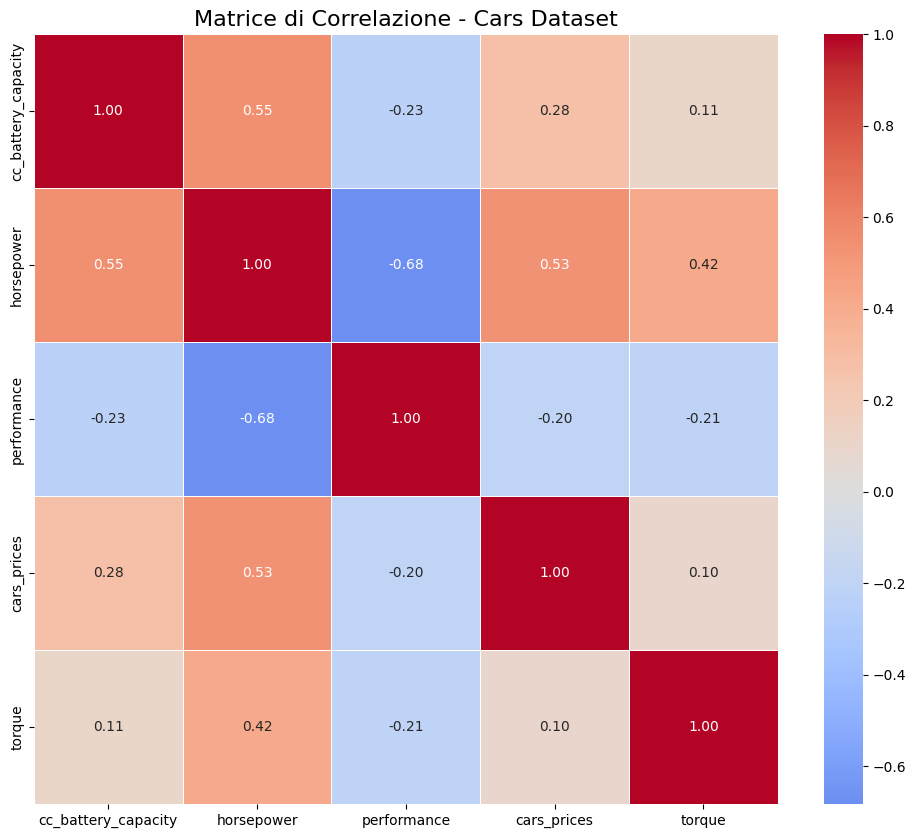

In [24]:
# 1. Calcolo la matrice di correlazione (coefficiente di Pearson)
# Nota: Se hai 'df_clean' dall'analisi precedente usa quello, altrimenti usa 'df'
corr_matrix = numerical.corr()

# 2. Setup della figura
plt.figure(figsize=(12, 10))

# 3. Creazione della Heatmap
# annot=True: scrive i numeri nelle celle
# cmap='coolwarm': Rosso=Positivo, Blu=Negativo, Bianco=Neutro
# fmt=".2f": arrotonda a 2 decimali per leggibilità
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            linewidths=0.5, 
            linecolor='white',
            fmt=".2f")

plt.title('Matrice di Correlazione - Cars Dataset', fontsize=16)
plt.show()

In [25]:
numerical.columns

Index(['cc_battery_capacity', 'horsepower', 'performance', 'cars_prices',
       'torque'],
      dtype='object')

<Axes: ylabel='cc_battery_capacity'>

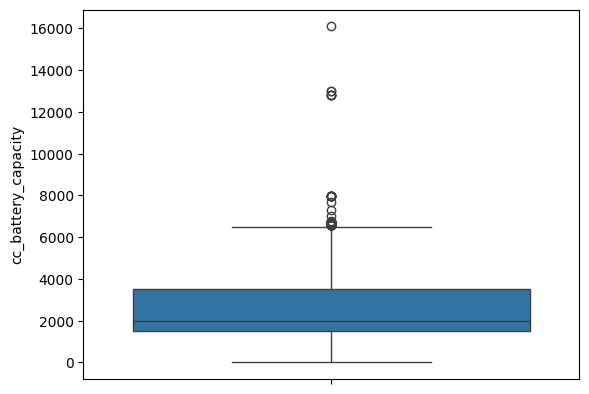

In [26]:
sns.boxplot(clean_df['cc_battery_capacity'])

<Axes: ylabel='horsepower'>

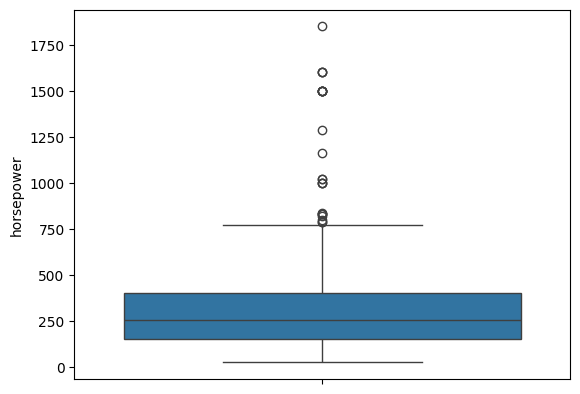

In [27]:
sns.boxplot(clean_df['horsepower'])

<Axes: ylabel='performance'>

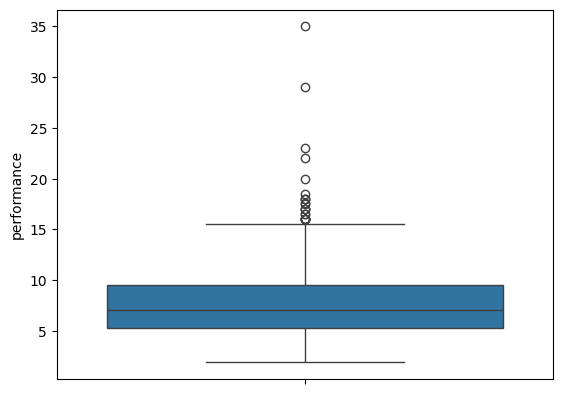

In [28]:
sns.boxplot(clean_df['performance'])

<Axes: ylabel='cars_prices'>

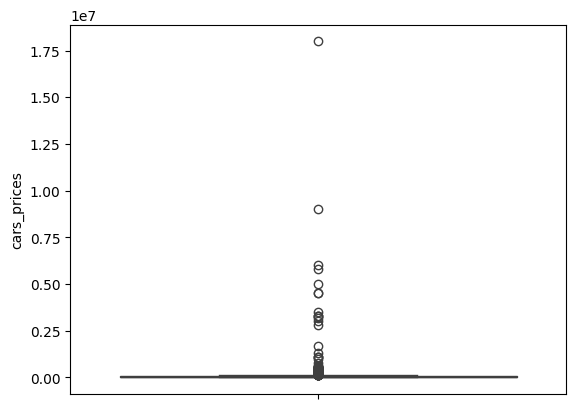

In [29]:
sns.boxplot(clean_df['cars_prices']) 

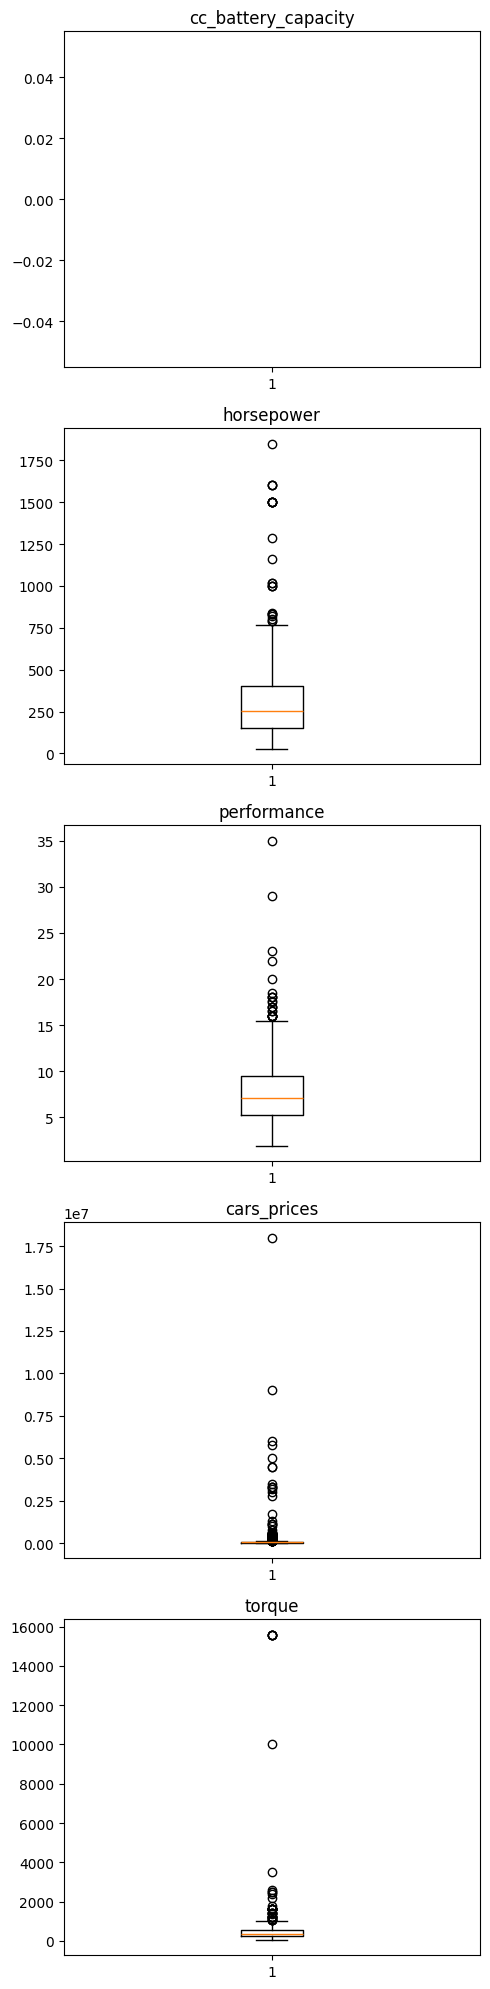

In [30]:
cols = numerical.columns   # prende le prime 5 colonne

fig, axes = plt.subplots(5, 1, figsize=(5, 20))

for ax, col in zip(axes, cols):
    ax.boxplot(numerical[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [31]:
for col in numerical.columns:
    # 1. Calcolo dei Quartili
    Q1 = clean_df[col].quantile(0.25)
    Q3 = clean_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # 2. Definizione dei limiti
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR

    print(f"Intervallo 'Normale' per {col}: da {lower_bound:.2f} a {upper_bound:.2f}")

    # 3. Individuazione degli Outlier
    outliers_iqr = clean_df[(clean_df[col] < lower_bound) | (clean_df[col] > upper_bound)]
    print(f"Numero di Outlier rilevati con IQR: {len(outliers_iqr)}")
    print(f"Percentuale sul totale: {len(outliers_iqr)/len(clean_df)*100:.2f}%")

    # Vediamo alcuni di questi outlier estremi
    print("\nEsempi di outlier estremi:")
    print(outliers_iqr[col].sort_values(ascending=False).head(5))
    
    print()
    print("-" * 50)

Intervallo 'Normale' per cc_battery_capacity: da -1500.00 a 6500.00
Numero di Outlier rilevati con IQR: 66
Percentuale sul totale: 5.50%

Esempi di outlier estremi:
891    16100.0
890    13000.0
893    13000.0
894    12800.0
896    12800.0
Name: cc_battery_capacity, dtype: float64

--------------------------------------------------
Intervallo 'Normale' per horsepower: da -217.50 a 770.50
Numero di Outlier rilevati con IQR: 25
Percentuale sul totale: 2.08%

Esempi di outlier estremi:
888    1850.0
886    1600.0
882    1600.0
889    1600.0
880    1500.0
Name: horsepower, dtype: float64

--------------------------------------------------
Intervallo 'Normale' per performance: da -1.00 a 15.80
Numero di Outlier rilevati con IQR: 23
Percentuale sul totale: 1.92%

Esempi di outlier estremi:
1197    35.0
635     29.0
317     23.0
898     22.0
897     20.0
Name: performance, dtype: float64

--------------------------------------------------
Intervallo 'Normale' per cars_prices: da -35000.00 a 1

In [32]:
for col in numerical.columns:
    # 1. Calcolo dei Quartili
    Q1 = clean_df[col].quantile(0.25)
    Q3 = clean_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # 2. Definizione dei limiti
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    
    mask = (clean_df[col] < lower_bound) | (clean_df[col] > upper_bound)
    clean_df = clean_df[~mask] #drop degli outlier

In [33]:
clean_df[col].nunique()  #per vedere il numero di valori unici

187

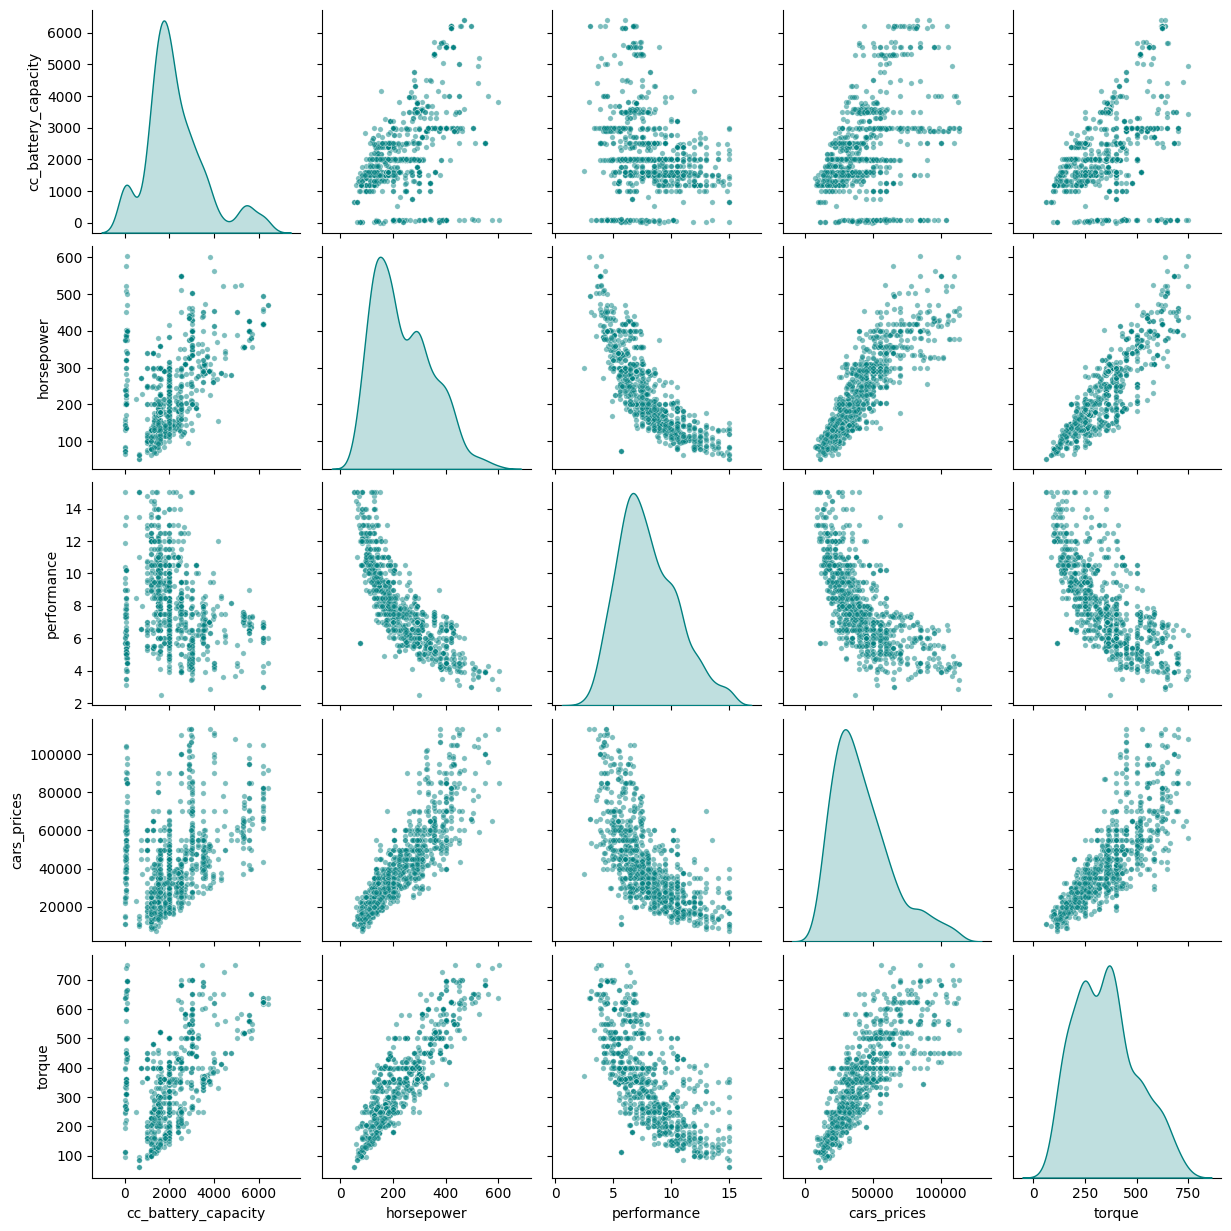

In [34]:
numerical = clean_df.select_dtypes(include=['float64', 'int64'])
sns.pairplot(numerical,
                diag_kind='kde', 
                 plot_kws={'alpha': 0.5, 's': 15, 'color': 'teal'},
                 diag_kws={'color': 'teal', 'fill': True},
                 height=2.5)

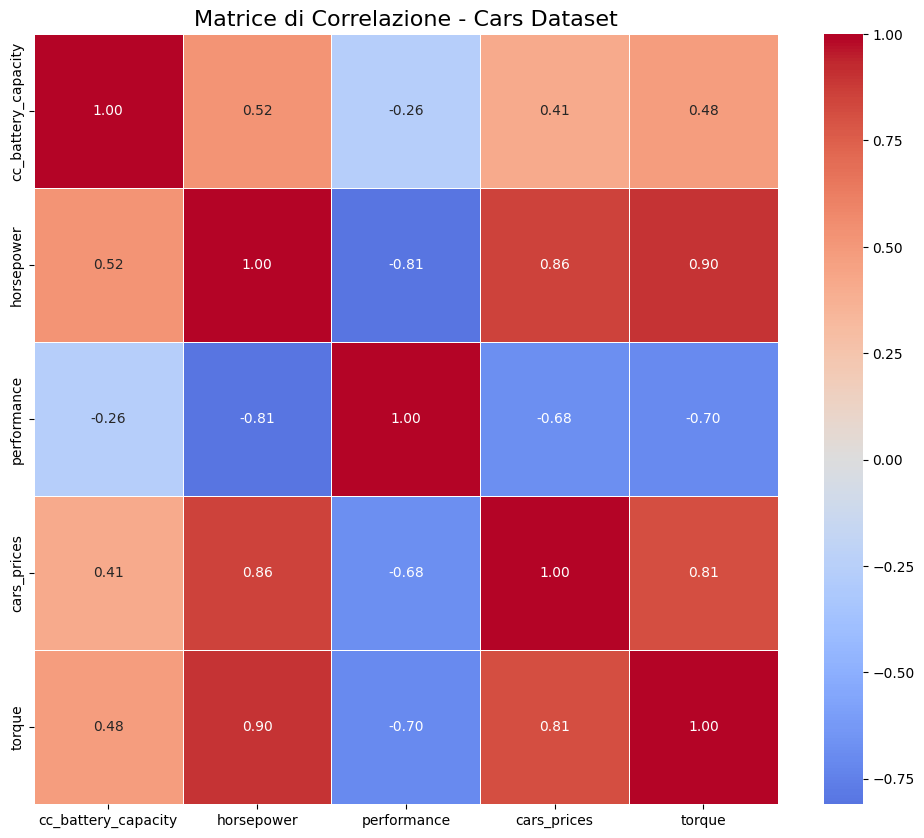

In [35]:
# 1. Calcolo la matrice di correlazione (coefficiente di Pearson)
# Nota: Se hai 'df_clean' dall'analisi precedente usa quello, altrimenti usa 'df'
corr_matrix = numerical.corr()

# 2. Setup della figura
plt.figure(figsize=(12, 10))

# 3. Creazione della Heatmap
# annot=True: scrive i numeri nelle celle
# cmap='coolwarm': Rosso=Positivo, Blu=Negativo, Bianco=Neutro
# fmt=".2f": arrotonda a 2 decimali per leggibilità
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            linewidths=0.5, 
            linecolor='white',
            fmt=".2f")

plt.title('Matrice di Correlazione - Cars Dataset', fontsize=16)
plt.show()

**Scatter plots di variabili correlate fra loro**

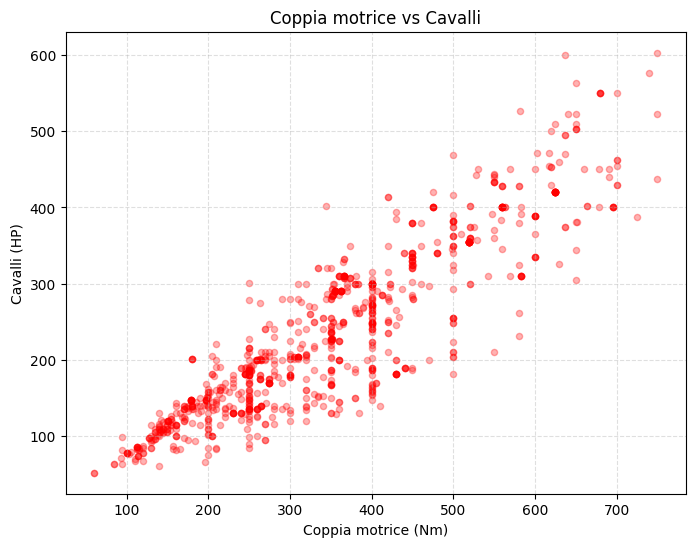

In [36]:
x = clean_df["torque"]
y = clean_df["horsepower"]

plt.figure(figsize=(8, 6))

plt.scatter(x, y, s=20, alpha=0.3, color = "r")
plt.xlabel("Coppia motrice (Nm)")
plt.ylabel("Cavalli (HP)")
plt.title("Coppia motrice vs Cavalli")
plt.grid(True, linestyle="--", alpha=0.4)

plt.show()

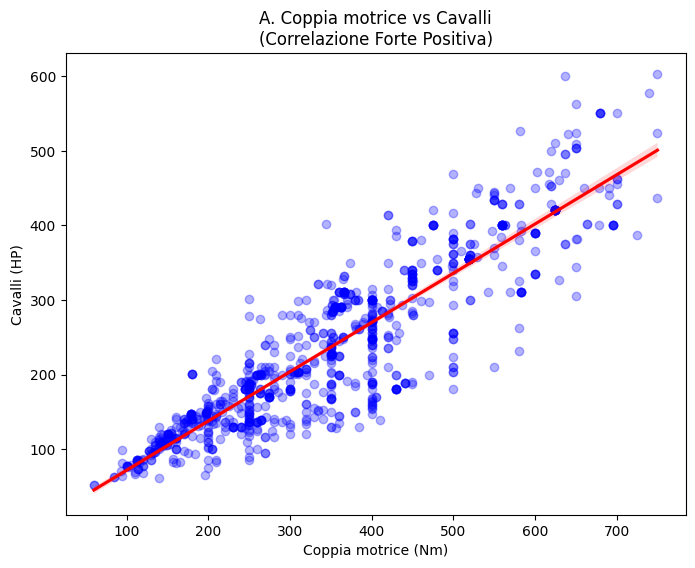

In [37]:
# --- GRAFICO A:  (coppia motrice vs cavalli) ---
# È la correlazione più forte (0.90). Ci aspettiamo una linea netta verso l'alto 
# (è chiaro che il momento ercitato dal motore e la sua potenza siiano strettamente collegati).

fig, ax = plt.subplots(figsize=(8, 6))

sns.regplot(
    x="torque",
    y="horsepower",
    data=clean_df,
    scatter_kws={'alpha': 0.3, 'color': 'blue'},
    line_kws={'color': 'red'},
    ax=ax
)

ax.set_title('A. Coppia motrice vs Cavalli\n(Correlazione Forte Positiva)')
ax.set_xlabel("Coppia motrice (Nm)")
ax.set_ylabel("Cavalli (HP)")

plt.show()

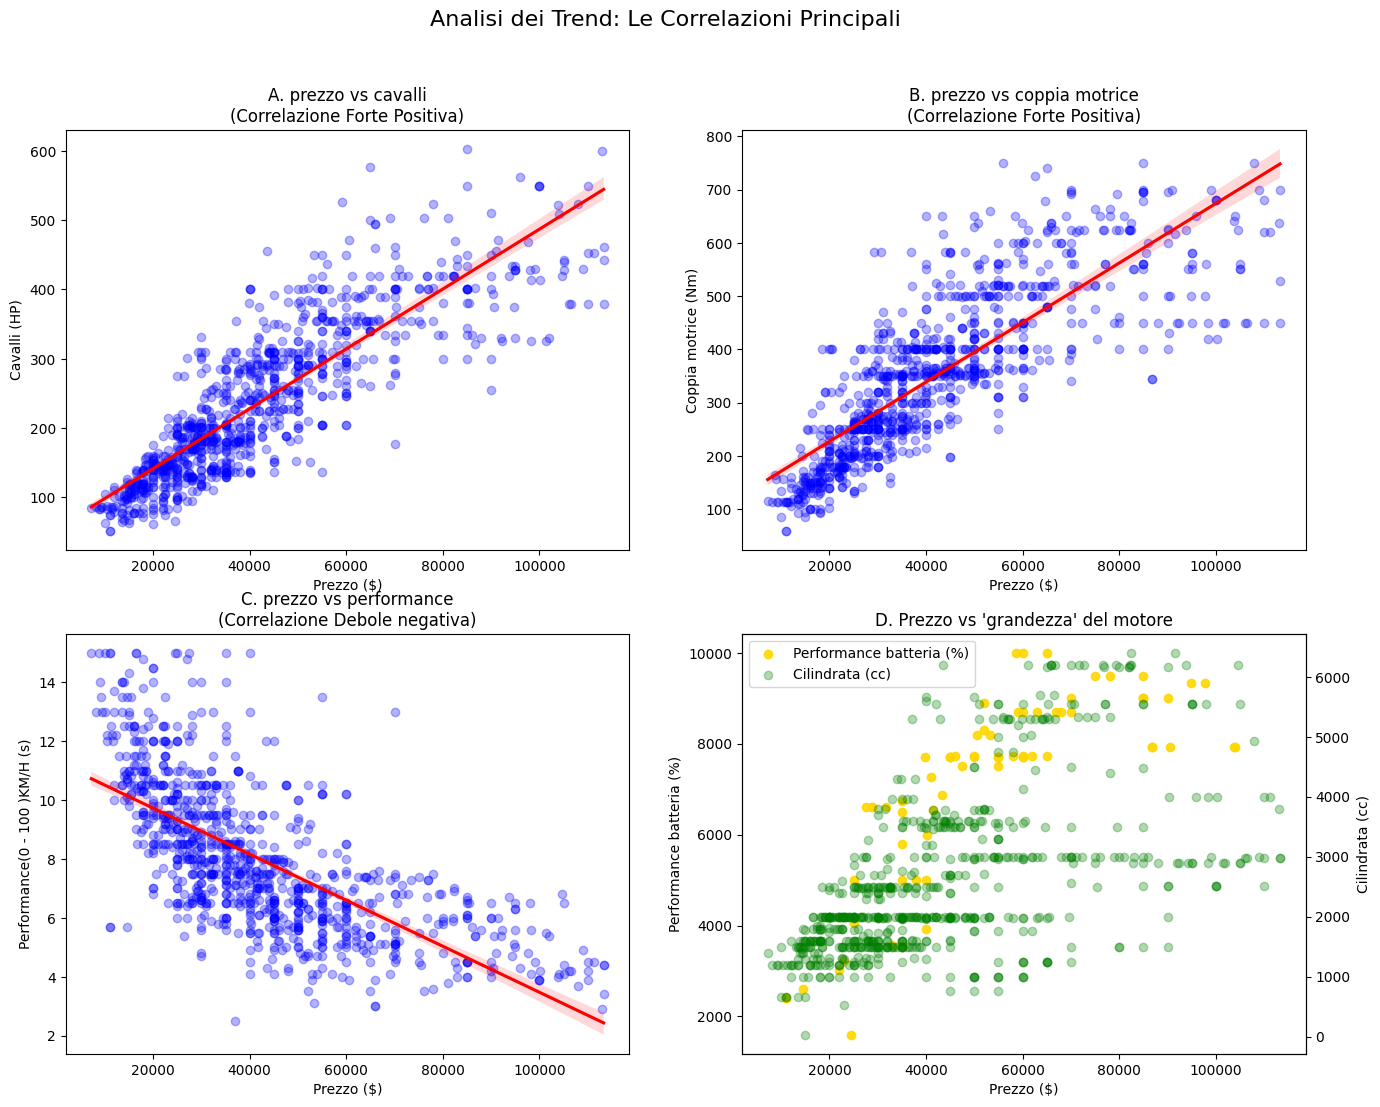

In [38]:
# 2. Impostiamo una griglia 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Analisi dei Trend: Le Correlazioni Principali', fontsize=16)

# --- GRAFICO A:  (coppia motrice vs cavalli) ---
# La correlazione è forte (0.86). Ci aspettiamo una linea netta verso l'alto 
# (macchine più potenti costano di più!).
sns.regplot(ax=axes[0, 0], x="cars_prices", y='horsepower', data = clean_df, 
            scatter_kws={'alpha':0.3, 'color':'blue'}, line_kws={'color':'red'})
axes[0, 0].set_title('A. prezzo vs cavalli\n(Correlazione Forte Positiva)')
axes[0, 0].set_xlabel("Prezzo ($)")
axes[0, 0].set_ylabel("Cavalli (HP)")   

# --- GRAFICO B:  (prezzo vs coppia motrice) ---
# la correlazione è forte (0.82). Ci aspettiamo una linea netta verso l'alto 
# (macchine più potenti costano di più!). E' essenzialmente analoga alla precedente data la correlazione fra coppia e cavalli.  
sns.regplot(ax=axes[0, 1], x="cars_prices", y='torque', data = clean_df, 
            scatter_kws={'alpha':0.3, 'color':'blue'}, line_kws={'color':'red'})
axes[0, 1].set_title('B. prezzo vs coppia motrice\n(Correlazione Forte Positiva)')
axes[0, 1].set_xlabel("Prezzo ($)")
axes[0, 1].set_ylabel("Coppia motrice (Nm)")  

# --- GRAFICO C:  (prezzo vs performance) ---
# la correlazione è debole e negativa (-0.47). Ci aspettiamo una linea netta verso l'alto 
# (più il tempo di acellerazione è basso più la macchina costa - non è il fattore più importante).
sns.regplot(ax=axes[1, 0], x="cars_prices", y='performance', data = clean_df, 
            scatter_kws={'alpha':0.3, 'color':'blue'}, line_kws={'color':'red'})
axes[1, 0].set_title('C. prezzo vs performance\n(Correlazione Debole negativa)')
axes[1, 0].set_xlabel("Prezzo ($)")
axes[1, 0].set_ylabel("Performance(0 - 100 )KM/H (s)")  

price_battery = clean_df[ clean_df['fuel_types'] == 'Electric' ]['cars_prices'] 
battery_cap  = clean_df[ clean_df['fuel_types'] == 'Electric' ]['cc_battery_capacity']

price_cil = clean_df[ clean_df['fuel_types'] == 'Petrol'  ]['cars_prices'] 
cilindrata = clean_df[ clean_df['fuel_types'] == 'Petrol' ]['cc_battery_capacity']

# --- GRAFICO D:  (prezzo vs 'grandezza' del motore) ---
# la correlazione è debole e negativa (-0.47). Ci aspettiamo una linea netta verso l'alto 
# (più il tempo di acellerazione è basso più la macchina costa - non è il fattore più importante).
# Asse principale (y1): performance batteria (0–100)
ax1 = axes[1, 1]

# Scatter 1: prezzo vs performance batteria
ax1.scatter(
    price_battery,
    battery_cap * 100,
    alpha=0.9,
    color='gold',
    label='Performance batteria (%)'
)

ax1.set_xlabel("Prezzo ($)")
ax1.set_ylabel("Performance batteria (%)")
ax1.tick_params(axis='y')

# --- Secondo asse Y (y2): cilindrata in CC ---
ax2 = ax1.twinx()

ax2.scatter(
    price_cil,
    cilindrata,
    alpha=0.3,
    color='green',
    label='Cilindrata (cc)'
)

ax2.set_ylabel("Cilindrata (cc)")
ax2.tick_params(axis='y')

# Titolo (lo mettiamo sull'asse principale)
ax1.set_title("D. Prezzo vs 'grandezza' del motore")

# Legenda combinata
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
axes[1, 1].legend(handles1 + handles2, labels1 + labels2, loc='upper left')

**Feature ingenereeng**

In [39]:
clean_df.columns

Index(['company_names', 'cars_names', 'cc_battery_capacity', 'horsepower',
       'total_speed', 'performance', 'cars_prices', 'fuel_types', 'seats',
       'torque'],
      dtype='object')

In [40]:
clean_df["power_per_dollars"] = clean_df['horsepower'] / clean_df['cars_prices']
clean_df["performance_per_dollars"] = clean_df['performance'] / clean_df['cars_prices']

In [41]:
power_per_dollars_per_company = (
    clean_df
        .groupby("company_names")["power_per_dollars"]
        .mean()
        .reset_index()                 # torna a tabella
        .pivot_table(
            index="company_names",
            values="power_per_dollars"
        )
)

power_per_dollars_per_company

,power_per_dollars
company_names,
Acura,0.005843
Audi,0.005577
Bmw,0.004879
Cadillac,0.006172
Chevrolet,0.006767
Ford,0.006595
Gmc,0.005982
Honda,0.007065
Hyundai,0.006721


<Axes: xlabel='company_names'>

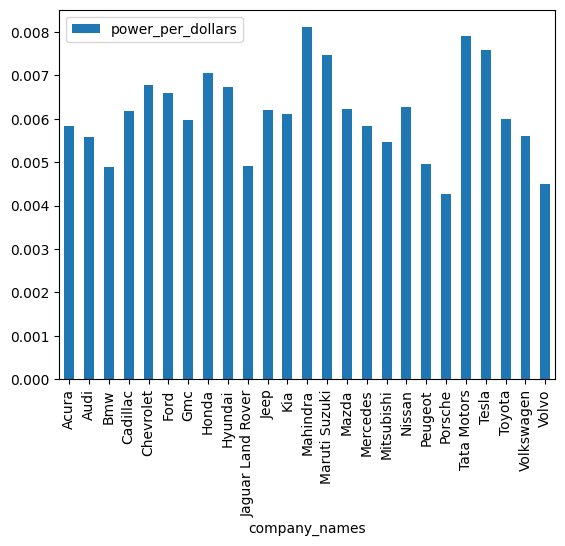

In [42]:
power_per_dollars_per_company.plot.bar()